# Directory dataset to Kaggle

In [1]:
pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
 ! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-10 11:26:39           6722        386  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indicators of Heart Disease           3MB  2022-02-16 10:18:03          10415        230  1.0              
datasets/ankanhore545/cost-of-living-index-2022                Cost of Living Index 2022                          4KB  2022-04-09 06:22:10           2321         35  0.8235294        
datasets/prasertk/best-tv-shows-of-all-time                    Best TV shows of 

Download data dari kaggle

In [6]:
! kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! mkdir asl-alphabet

mkdir: cannot create directory ‘asl-alphabet’: File exists


In [8]:
! unzip asl-alphabet.zip -d asl-alphabet

Archive:  asl-alphabet.zip
replace asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Import library dan preprocessing data

In [1]:
import cv2
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
import os
import skimage

In [28]:
## print(os.listdir("/content/asl-alphabet/asl_alphabet_test/"))

['asl_alphabet_test']


In [2]:
from skimage.transform import resize
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


Lihat ukuran gambar

In [3]:
X_train.shape


(87000, 64, 64, 3)

In [4]:
y_train.shape

(87000,)

In [5]:
X_train[0].shape

(64, 64, 3)

In [6]:
X_data = X_train
y_data = y_train

lihat image

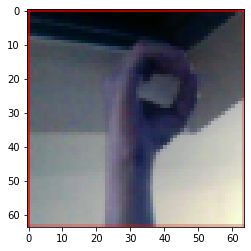

[[[0.8423407  0.00784314 0.0129902 ]
  [0.6199602  0.01568628 0.0245098 ]
  [0.6112745  0.00923713 0.03227635]
  ...
  [0.63008577 0.05001532 0.06799939]
  [0.68054533 0.09765625 0.11731005]
  [0.784712   0.06821385 0.08094363]]

 [[0.6092678  0.01602328 0.04024203]
  [0.04289216 0.03284314 0.08137255]
  [0.02892157 0.02622549 0.09140625]
  ...
  [0.21000306 0.21933211 0.25536153]
  [0.27775735 0.2610907  0.3009038 ]
  [0.4617647  0.18647365 0.19799326]]

 [[0.6280944  0.04082414 0.05471814]
  [0.06424633 0.0997549  0.1399663 ]
  [0.0375     0.08161765 0.13651961]
  ...
  [0.25983456 0.2685202  0.30405945]
  [0.24880515 0.24241728 0.28287378]
  [0.4516391  0.1867647  0.19649203]]

 ...

 [[0.7970588  0.2136489  0.2136489 ]
  [0.5887408  0.6120098  0.61420035]
  [0.54264706 0.6175398  0.62352943]
  ...
  [0.98308825 0.9909314  0.8437653 ]
  [0.96714157 0.99215686 0.8620098 ]
  [0.8889706  0.75710785 0.6696844 ]]

 [[0.792693   0.21328124 0.2134804 ]
  [0.5905484  0.6022059  0.6177543 ]


In [7]:
plt.imshow(X_data[0])
plt.show()
print(X_data[0])

Split Data set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=65,stratify=y_data)

In [9]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [11]:
import gc
del X_data
del y_data
gc.collect()

2721

# Modeling

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=1, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

## Modelling experimen 1

In [13]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [14]:
model1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(64, 64, 3)),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation="relu"), 
                                    tf.keras.layers.Dense(29, activation="softmax")
                                    ])
model1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 64)                786496    
                                                                 
 dense_1 (Dense)             (None, 29)                1885      
                                                                 
Total params: 788,381
Trainable params: 788,381
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist1 = model1.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/50
952/952 - 36s - loss: 3.3782 - accuracy: 0.0341 - val_loss: 3.3673 - val_accuracy: 0.0345 - 36s/epoch - 38ms/step
Epoch 2/50
Restoring model weights from the end of the best epoch: 1.
952/952 - 33s - loss: 3.3675 - accuracy: 0.0333 - val_loss: 3.3673 - val_accuracy: 0.0345 - 33s/epoch - 34ms/step
Epoch 2: early stopping


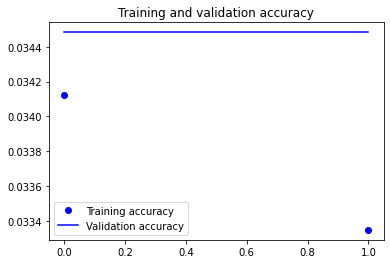

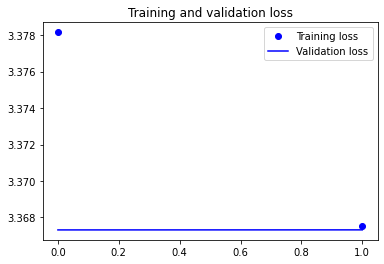

In [16]:
accuracy = hist1.history['accuracy']
val_accuracy = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Modelling Experimen 2


In [17]:
cnn_model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(29, activation='softmax')
])
cnn_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [61]:
! mkdir cnn_model1

In [18]:
checkpoint_path = "cnn_model1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
hist2 = cnn_model1.fit(X_train, y_cat_train,
          epochs=100,
          batch_size=64,
          verbose=1,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop, cp_callback])

Epoch 1/100
952/952 [==============================] - ETA: 0s - loss: 1.2538 - accuracy: 0.6297
Epoch 1: saving model to cnn_model1/cp.ckpt
952/952 [==============================] - 623s 654ms/step - loss: 1.2538 - accuracy: 0.6297 - val_loss: 0.4164 - val_accuracy: 0.8715
Epoch 2/100
952/952 [==============================] - ETA: 0s - loss: 0.2379 - accuracy: 0.9249
Epoch 2: saving model to cnn_model1/cp.ckpt
952/952 [==============================] - 637s 669ms/step - loss: 0.2379 - accuracy: 0.9249 - val_loss: 0.1729 - val_accuracy: 0.9469
Epoch 3/100
952/952 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9644
Epoch 3: saving model to cnn_model1/cp.ckpt
952/952 [==============================] - 638s 670ms/step - loss: 0.1125 - accuracy: 0.9644 - val_loss: 0.1233 - val_accuracy: 0.9581
Epoch 4/100
952/952 [==============================] - ETA: 0s - loss: 0.0740 - accuracy: 0.9764
Epoch 4: saving model to cnn_model1/cp.ckpt
952/952 [======================

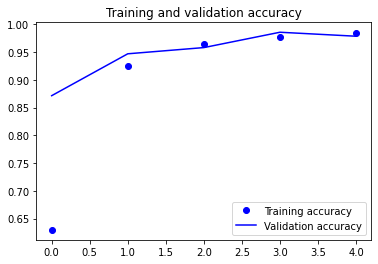

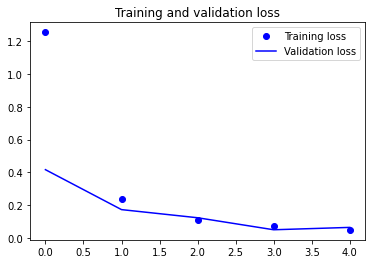

In [20]:
accuracy = hist2.history['accuracy']
val_accuracy = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predicting Modelling

In [22]:
Prediction = cnn_model1.predict(X_test)

In [26]:
Prediction1 = np.argmax(Prediction, axis=1)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,Prediction1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       900
           1       0.98      1.00      0.99       900
           2       1.00      0.99      0.99       900
           3       1.00      0.96      0.98       900
           4       0.98      0.97      0.98       900
           5       0.98      1.00      0.99       900
           6       0.99      0.97      0.98       900
           7       0.98      0.99      0.99       900
           8       0.99      0.99      0.99       900
           9       0.99      1.00      0.99       900
          10       1.00      1.00      1.00       900
          11       0.99      1.00      0.99       900
          12       0.96      0.99      0.97       900
          13       0.99      0.95      0.97       900
          14       0.97      0.99      0.98       900
          15       1.00      1.00      1.00       900
          16       1.00      1.00      1.00       900
          17       0.99    

In [30]:
from keras.models import load_model

In [31]:
cnn_model1.save_weights('cnn_asl_weights.h5')
cnn_model1.save('cnn_asl.h5')